# Time Series - Facebook Prophet

### Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import _pickle as pickle

from fbprophet import Prophet as proph

## FBProphet for Daily Data

### Loading in the Data

In [45]:
with open("daily_df.pkl",'rb') as fp:
    ts = pickle.load(fp)

### Formatting the data for Facebook Prophet

In [46]:
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

ts.head()

,ds,y
0,2015-10-15,1.97
1,2015-10-16,1.94
2,2015-10-19,2.01
3,2015-10-20,2.02
4,2015-10-21,2.10


#### Plotting

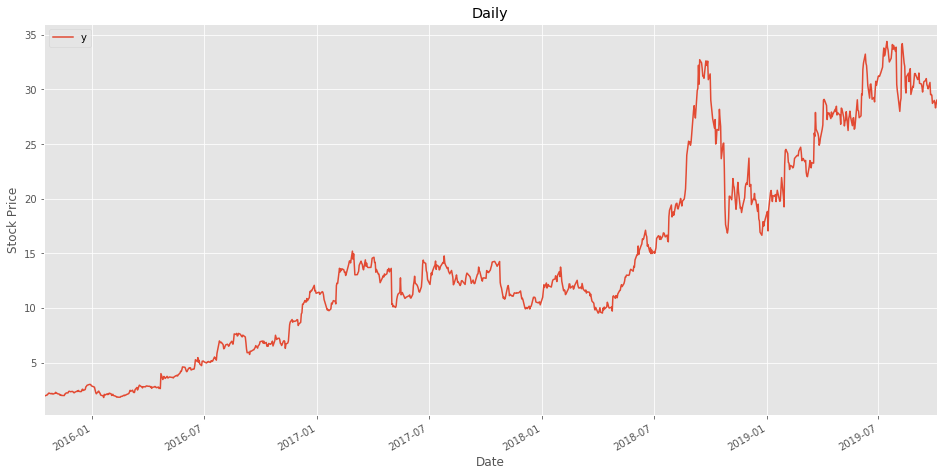

In [47]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_title("Daily")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

### Modeling

In [48]:
# Fitting and training
mod = proph(interval_width=0.95, daily_seasonality=True)
mod.fit(ts)

#### Creating future dates to forecast

In [49]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=90, freq='D')
future.tail()

,ds
1085,2019-12-29
1086,2019-12-30
1087,2019-12-31
1088,2020-01-01
1089,2020-01-02


#### Forecasting future values

In [60]:
# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
day90pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1085,2019-12-29,32.295591,27.183492,34.927082,31.161397,33.738237,-1.039620,-1.039620,-1.039620,0.550125,...,-0.068766,-0.068766,-0.068766,-1.520979,-1.520979,-1.520979,0.0,0.0,0.0,31.255971
1086,2019-12-30,32.320089,27.493808,35.024037,31.157049,33.782426,-0.930180,-0.930180,-0.930180,0.550125,...,0.022116,0.022116,0.022116,-1.502421,-1.502421,-1.502421,0.0,0.0,0.0,31.389908
1087,2019-12-31,32.344586,28.119549,35.478603,31.154860,33.820629,-0.845145,-0.845145,-0.845145,0.550125,...,0.089604,0.089604,0.089604,-1.484874,-1.484874,-1.484874,0.0,0.0,0.0,31.499441
1088,2020-01-01,32.369084,27.814820,35.560118,31.168582,33.870438,-0.871645,-0.871645,-0.871645,0.550125,...,0.047068,0.047068,0.047068,-1.468838,-1.468838,-1.468838,0.0,0.0,0.0,31.497439
1089,2020-01-02,32.393582,27.705658,35.491239,31.174890,33.920247,-0.900849,-0.900849,-0.900849,0.550125,...,0.003765,0.003765,0.003765,-1.454739,-1.454739,-1.454739,0.0,0.0,0.0,31.492732


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

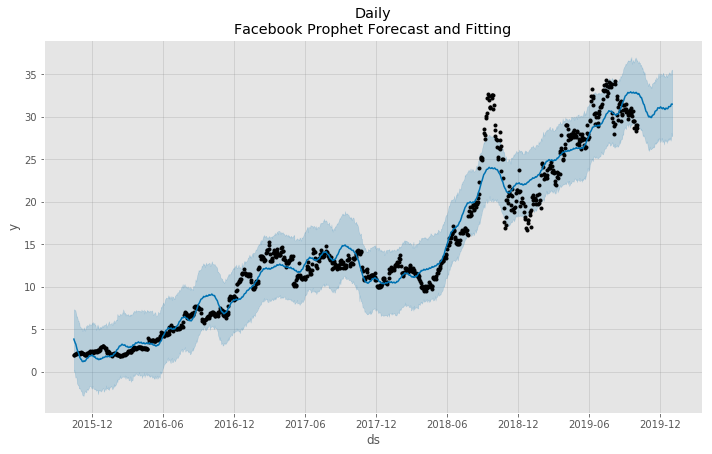

In [61]:
mod.plot(forecast, uncertainty=True)
plt.title('Daily\nFacebook Prophet Forecast and Fitting')
plt.show()

#### Graph above zoomed in

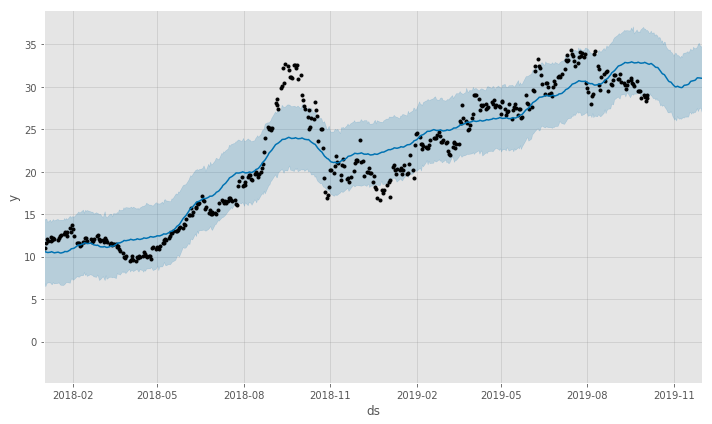

In [62]:
mod.plot(forecast, uncertainty=True)

plt.xlim(['2018', '2019-12'])
plt.show()

#### Plotted components of the forecasts

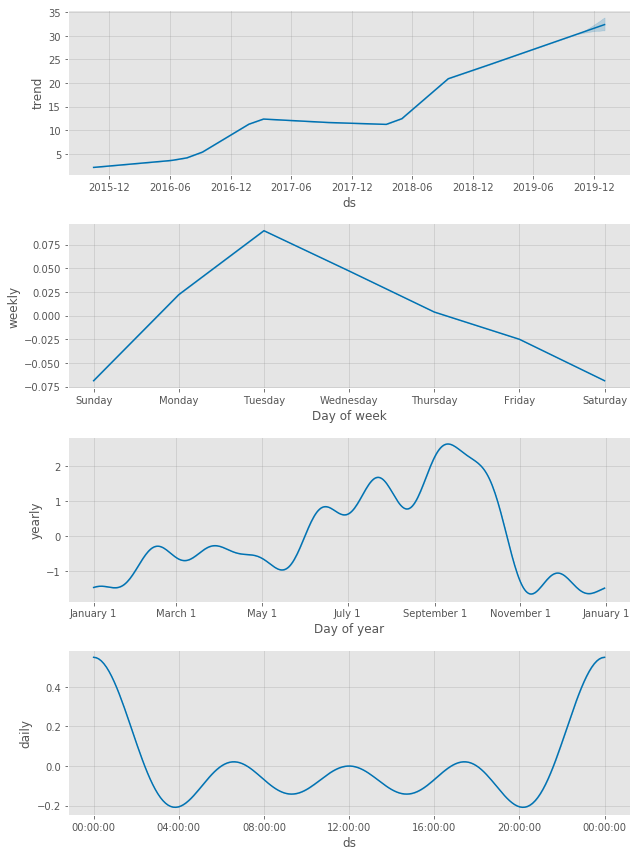

In [63]:
mod.plot_components(forecast)
plt.show()

## FBProphet for Weekly Data

Loading the weekly data and reformatting for FBP

In [79]:
# Loading in the Weekly data
with open("week_df.pkl",'rb') as fp:
    ts = pickle.load(fp)
    
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

ts.head()

,ds,y
0,2000-08-11,28.875
1,2000-08-18,35.125
2,2000-08-25,34.500
3,2000-09-01,37.500
4,2000-09-08,31.875


### Plotting the weekly data

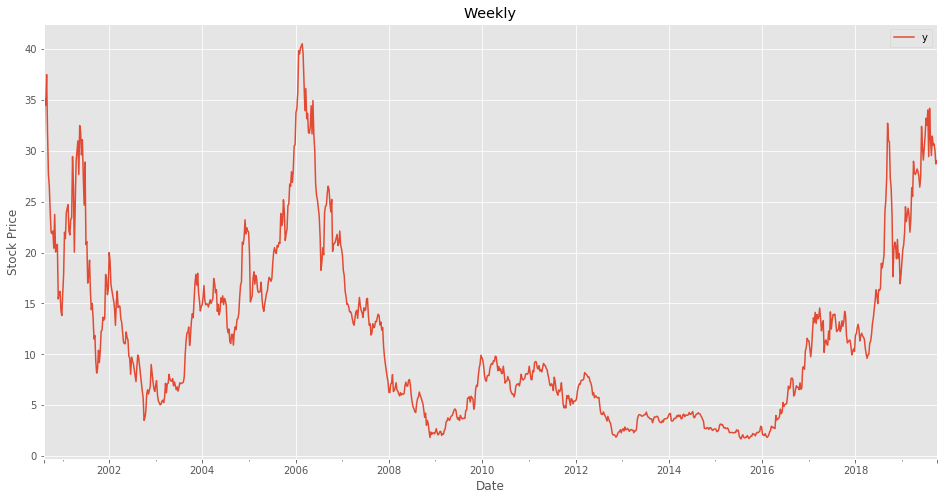

In [80]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_title("Weekly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

### Modeling Weekly

In [81]:
# Fitting and training
mod = proph(interval_width=0.95, weekly_seasonality=True)
mod.fit(ts)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=12, freq='W')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
week12pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1007,2019-11-24,30.032372,23.881899,37.094727,29.927734,30.217620,0.157270,0.157270,0.157270,0.330578,0.330578,0.330578,-0.173308,-0.173308,-0.173308,0.0,0.0,0.0,30.189641
1008,2019-12-01,30.156777,23.837707,37.286825,30.023888,30.376234,0.127122,0.127122,0.127122,0.330578,0.330578,0.330578,-0.203456,-0.203456,-0.203456,0.0,0.0,0.0,30.283899
1009,2019-12-08,30.281182,23.705375,37.289235,30.108792,30.542957,0.020491,0.020491,0.020491,0.330578,0.330578,0.330578,-0.310087,-0.310087,-0.310087,0.0,0.0,0.0,30.301673
1010,2019-12-15,30.405588,23.734911,36.992661,30.201860,30.709925,-0.044800,-0.044800,-0.044800,0.330578,0.330578,0.330578,-0.375378,-0.375378,-0.375378,0.0,0.0,0.0,30.360788
1011,2019-12-22,30.529993,23.993801,37.387827,30.297859,30.879535,0.001697,0.001697,0.001697,0.330578,0.330578,0.330578,-0.328881,-0.328881,-0.328881,0.0,0.0,0.0,30.531690


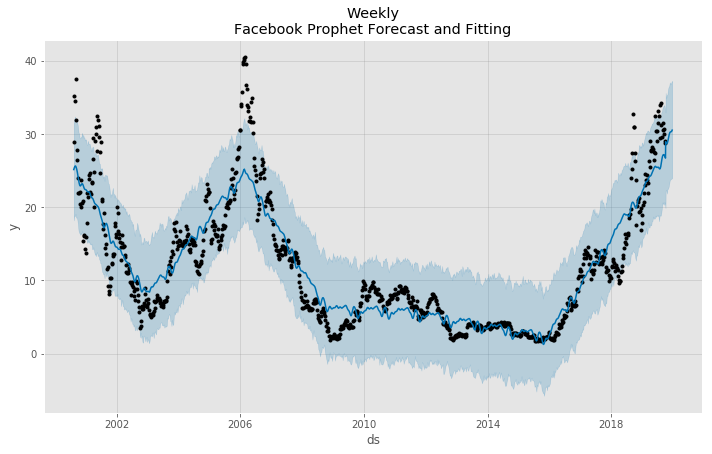

In [68]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Weekly\nFacebook Prophet Forecast and Fitting')
plt.show()

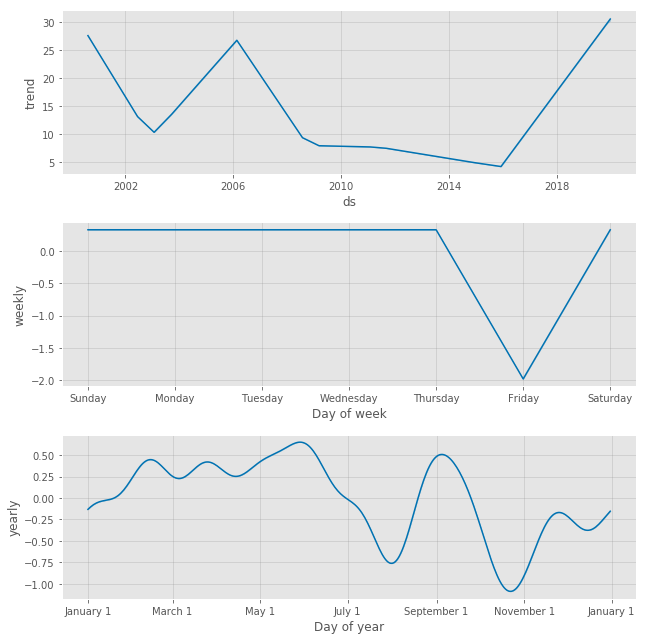

In [69]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

## FBProphet for Monthly Data

Loading in the monthly data

In [70]:
# Loading in the Weekly data
with open("month_df.pkl",'rb') as fp:
    ts = pickle.load(fp)
    
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

ts.head()

,ds,y
0,1980-03-31,2.541667
1,1980-04-30,2.552083
2,1980-05-30,3.166667
3,1980-06-30,3.041667
4,1980-07-31,4.135417


### Plotting the monthly data

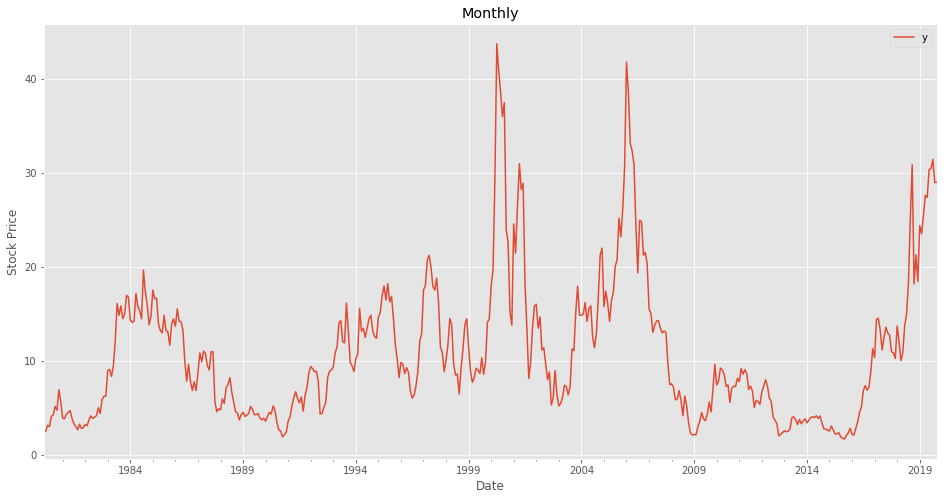

In [71]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_title("Monthly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

### Modeling the Monthly data

In [78]:
# Fitting and training
mod = proph(interval_width=0.95)
mod.fit(ts)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=3, freq='M')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
month3pred = forecast[['yhat']].iloc[[-1]]
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
474,2019-09-30,9.610424,-3.720931,23.776362,9.610424,9.610424,-0.078086,-0.078086,-0.078086,-0.078086,-0.078086,-0.078086,0.0,0.0,0.0,9.532338
475,2019-10-31,9.599717,-3.974170,22.921748,9.599717,9.599717,-0.543215,-0.543215,-0.543215,-0.543215,-0.543215,-0.543215,0.0,0.0,0.0,9.056502
476,2019-11-30,9.589356,-5.492009,23.781297,9.589356,9.589422,-0.479749,-0.479749,-0.479749,-0.479749,-0.479749,-0.479749,0.0,0.0,0.0,9.109607
477,2019-12-31,9.578649,-4.783973,22.001454,9.577741,9.580124,-0.538766,-0.538766,-0.538766,-0.538766,-0.538766,-0.538766,0.0,0.0,0.0,9.039883
478,2020-01-31,9.567942,-3.382871,24.234902,9.565011,9.571643,0.531157,0.531157,0.531157,0.531157,0.531157,0.531157,0.0,0.0,0.0,10.099100


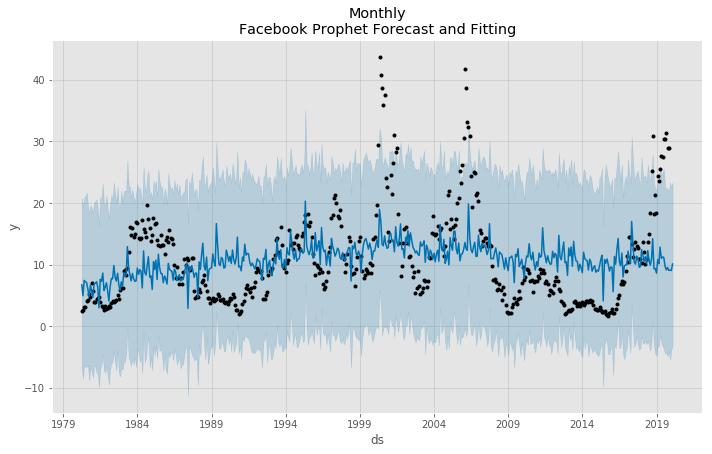

In [73]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Monthly\nFacebook Prophet Forecast and Fitting')
plt.show()

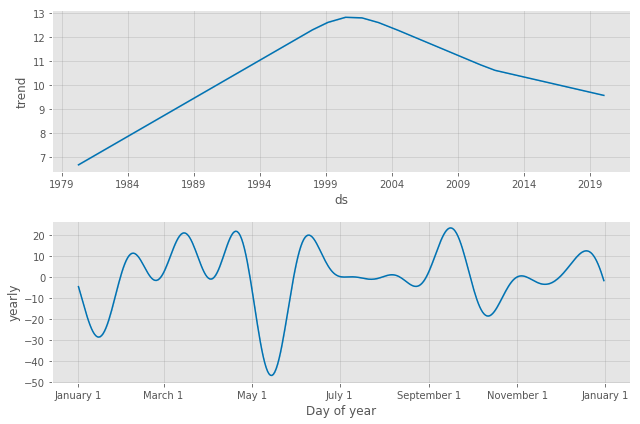

In [74]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

## Saving and exporting the predictions from each time interval

In [89]:
fb_preds = pd.concat([day90pred, week12pred, month3pred], ignore_index=True).rename(columns={'yhat':'predictions'},
                                                                                    index={0:'day', 1:'week', 2:'month'})
print(fb_preds)

# Exporting 
with open("fb_preds.pkl", 'wb') as fp:
    pickle.dump(fb_preds, fp)

       predictions
day      31.492732
week     30.531690
month    10.099100
